![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/web-sites-full/web_sites4.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [214]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [215]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [216]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [219]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [220]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]",/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]",/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'], ['01/08/2018', '01/06/2018']]",/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Esplanade-Berlin.html,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Friendly']",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]",/Restaurant_Review-g187309-d6864963-Reviews-Augustiner_Schutzen_Garten-Munich_Upper_Bavaria_Bavaria.html,d6864963


In [221]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [222]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]",/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]",/Restaurant_Review-g186525-d13129638-Reviews-Black_Ivy-Edinburgh_Scotland.html,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vegetarian Friendly', 'Gluten Free Options']",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic'], ['12/06/2017', '11/22/2017']]",/Restaurant_Review-g186338-d680417-Reviews-Quirinale-London_England.html,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seafood', 'Vegetarian Friendly', 'Gluten Free Options']",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good but pricey'], ['02/08/2018', '01/24/2018']]",/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html,d1112354


In [223]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [224]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [225]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [227]:
df_sites.columns

Index(['ID_TA', 'URL_TA', 'Site'], dtype='object')

In [228]:
#data = data.merge(df_sites, on='ID_TA', how='left')

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [230]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
47375,id_1015,Geneva,"['American', 'European']",1020.0,$$ - $$$,13.0,"[['Great little restaurant'], ['08/02/2016']]",/Restaurant_Review-g188057-d7604763-Reviews-Le_Vintage-Geneva.html,d7604763,1,4.0
11144,id_990,Berlin,"['Cafe', 'Vegetarian Friendly', 'Vegan Options']",992.0,$$ - $$$,60.0,"[['Very tasty breakfast and great coffee', 'Fresh!'], ['10/12/2017', '09/04/2017']]",/Restaurant_Review-g187323-d1180249-Reviews-Bondi-Berlin.html,d1180249,1,4.0
23966,id_1372,Hamburg,NaN,1374.0,NaN,2.0,"[['My wife & I Found this small Resturant in...'], ['04/21/2015']]",/Restaurant_Review-g187331-d7985282-Reviews-China_Drive-Hamburg.html,d7985282,1,5.0
46675,id_925,Zurich,NaN,929.0,NaN,NaN,"[[], []]",/Restaurant_Review-g188113-d11894290-Reviews-Easy_Bar-Zurich.html,d11894290,1,5.0
26115,id_971,Vienna,"['Austrian', 'European', 'Central European', 'Vegetarian Friendly']",972.0,$$ - $$$,197.0,"[['Loung feel with local touch', 'Authentic City Centre Restaurant'], ['12/25/2017', '11/20/2017']]",/Restaurant_Review-g190454-d2251360-Reviews-Specht_Restaurant_Bar-Vienna.html,d2251360,1,3.5


In [231]:
data.Reviews

0                                                                                                              [[], []]
1                                    [['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]
2                                                [['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]
3                                         [['Most exquisite', 'Delicious and authentic'], ['12/06/2017', '11/22/2017']]
4                             [['Always the best in bratislava', 'Very good but pricey'], ['02/08/2018', '01/24/2018']]
                                                              ...                                                      
49995          [['The real Italian experience!', 'Wonderful food, wonderful experience'], ['12/16/2017', '11/12/2017']]
49996           [['Parisian atmosphere', 'Bit pricey but interesting decor and good...'], ['12/21/2017', '12/12/2017']]
49997    [['Good by swedish standards', 

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [232]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [233]:
data['Number_of_Reviews_isNAN'].value_counts()

0    46800
1     3200
Name: Number_of_Reviews_isNAN, dtype: int64

In [234]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка и создание признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [235]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [236]:
data['City'] = data['City'].apply(lambda x: x.lower() if isinstance(x, str) else x)

Создадим список городов в датасете

In [237]:
city_list = sorted(list(set(data['City'].values)))

Создадим признак страны и количества населения в каждом городе

In [238]:
country_city_set = [
    'Netherlands',
    'Greece',
    'Spain',
    'Germany',
    'Slovakia',
    'Belgium',
    'Hungary',
    'Denmark',
    'Ireland',
    'Scotland',
    'Switzerland',
    'Germany',
    'Finland',
    'Poland',
    'Portugal',
    'Slovenia',
    'England',
    'Luxembourg',
    'French',
    'Spain',
    'Italy',
    'Germany',
    'Portugal',
    'Norway',
    'French',
    'Chech Republic',
    'Italy',
    'Sweden',
    'Austria',
    'Poland',
    'Switzerland'
]
    
city_citizen_set = [
    869709,
    664046,
    1628552,
    3613495,
    431214,
    176545,
    1751010,
    616098,
    544107,
    482005,
    198899,
    1830584,
    639227,
    762776,
    506654,
    281226,
    8538689,
    119215,
    506615,
    3244730,
    1372434,
    1456039,
    214935,
    681067,
    2206488,
    1294513,
    2864466,
    789024,
    1897491,
    1766212,
    415367
]
    
d = {'City' : city_list, 'Country' : country_city_set, 'Citizen' : city_citizen_set}
df_city_country = pd.DataFrame(d)
df_city_country.set_index('City', inplace=True)
data = data.merge(df_city_country, on='City', how='left')

Создадим признак принадлежности страны к "Старой Европе"

In [239]:
old_europe_list = [
    'Austria',
    'Belgium',
    'Denmark',
    'England',
    'Finland',
    'French',
    'Germany',
    'Greece',
    'Ireland',
    'Italy',
    'Luxembourg',
    'Netherlands',
    'Portugal',
    'Scotland',
    'Spain',
    'Sweden',
]
    
data['OE'] = data['Country'].apply(lambda x: 1 if x in old_europe_list else 0)

Создадим признак того, является ли город столицей

In [240]:
capitals_list = [
     'amsterdam',
     'athens',
     'berlin',
     'bratislava',
     'brussels',
     'budapest',
     'copenhagen',
     'dublin',
     'edinburgh',
     'helsinki',
     'lisbon',
     'ljubljana',
     'london',
     'luxembourg',
     'madrid',
     'oslo',
     'paris',
     'prague',
     'rome',
     'stockholm',
     'vienna',
     'warsaw',
]
    
data['CC'] = data['City'].apply(lambda x: 1 if x in capitals_list else 0)

In [241]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data['Temp_City'] = data['City']
data = pd.get_dummies(data, columns=['City'], dummy_na=True)

#### Возьмем следующий признак "Price Range".

In [242]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [243]:
data = pd.get_dummies(data, columns=['Price Range'], dummy_na=True)

In [244]:
data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'Number_of_Reviews_isNAN', 'Country', 'Citizen', 'OE', 'CC', 'Temp_City', 'City_amsterdam', 'City_athens', 'City_barcelona', 'City_berlin', 'City_bratislava', 'City_brussels',
       'City_budapest', 'City_copenhagen', 'City_dublin', 'City_edinburgh', 'City_geneva', 'City_hamburg', 'City_helsinki', 'City_krakow', 'City_lisbon', 'City_ljubljana', 'City_london', 'City_luxembourg', 'City_lyon', 'City_madrid', 'City_milan', 'City_munich', 'City_oporto', 'City_oslo',
       'City_paris', 'City_prague', 'City_rome', 'City_stockholm', 'City_vienna', 'City_warsaw', 'City_zurich', 'City_nan', 'Price Range_$', 'Price Range_$$ - $$$', 'Price Range_$$$$', 'Price Range_nan'],
      dtype='object')

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

#### Обработаем признак "Cuisine Style"

преобразуем list like string в list

In [245]:
data['Cuisine Style'] =  data['Cuisine Style'].apply(lambda x: ast.literal_eval(x.lower()) if isinstance(x, str) else [])

Создадим признак количества кухонь для каждого ресторана

In [246]:
data['Cuisine Count'] = data['Cuisine Style'].map(lambda x: len(x))

Найдем количество ресторанов в каждом городе

In [247]:
rest_by_city_series = data.groupby('Temp_City').apply(lambda x: len(x['ID_TA'].values))

Создадим признак отношения ранга ресторана к количеству ресторанов в городе

In [248]:
data['RankingToRestaraunts'] = data['Ranking']/(data['Temp_City'].map(rest_by_city_series))

In [249]:
data['Cuisine Style'] = data['Cuisine Style'].map(lambda x: ["isNaN"] if x == [] else x)

Создадим список всех кухонь в датасете

In [250]:
cousines_set = set(data['Cuisine Style'].sum())

Создадим dummy variable признаки по кухням

In [251]:
for c in cousines_set:
    data[f"cuisine_{c}"] = data['Cuisine Style'].apply(lambda x: 1 if c in x else 0)

In [252]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Country,Citizen,OE,CC,Temp_City,City_amsterdam,City_athens,City_barcelona,City_berlin,City_bratislava,City_brussels,City_budapest,City_copenhagen,City_dublin,City_edinburgh,City_geneva,City_hamburg,City_helsinki,City_krakow,City_lisbon,City_ljubljana,City_london,City_luxembourg,City_lyon,City_madrid,City_milan,City_munich,City_oporto,City_oslo,City_paris,City_prague,City_rome,City_stockholm,City_vienna,City_warsaw,City_zurich,City_nan,Price Range_$,Price Range_$$ - $$$,Price Range_$$$$,Price Range_nan,Cuisine Count,RankingToRestaraunts,cuisine_contemporary,cuisine_wine bar,cuisine_austrian,cuisine_fast food,cuisine_international,cuisine_uzbek,cuisine_grill,cuisine_bar,cuisine_welsh,cuisine_indonesian,cuisine_sushi,cuisine_dutch,cuisine_nepali,cuisine_burmese,cuisine_central american,cuisine_central asian,cuisine_korean,cuisine_lebanese,cuisine_romanian,cuisine_mongolian,cuisine_spanish,cuisine_vegetarian friendly,cuisine_gluten free options,cuisine_malaysian,cuisine_taiwanese,cuisine_argentinean,cuisine_vegan options,cuisine_persian,cuisine_diner,cuisine_swiss,cuisine_mexican,cuisine_latin,cuisine_french,cuisine_ethiopian,cuisine_pizza,cuisine_canadian,cuisine_cambodian,cuisine_pakistani,cuisine_tibetan,cuisine_steakhouse,cuisine_caucasian,cuisine_european,cuisine_vietnamese,cuisine_yunnan,cuisine_soups,cuisine_irish,cuisine_scandinavian,cuisine_fusion,cuisine_danish,cuisine_swedish,cuisine_moroccan,cuisine_american,cuisine_eastern european,cuisine_russian,cuisine_xinjiang,cuisine_jamaican,cuisine_balti,cuisine_south american,cuisine_central european,cuisine_latvian,cuisine_hawaiian,cuisine_albanian,cuisine_african,cuisine_singaporean,cuisine_scottish,cuisine_southwestern,cuisine_mediterranean,cuisine_brew pub,cuisine_afghani,cuisine_polynesian,cuisine_greek,cuisine_gastropub,cuisine_australian,cuisine_british,cuisine_isNaN,cuisine_kosher,cuisine_sri lankan,cuisine_polish,cuisine_ukrainian,cuisine_delicatessen,cuisine_croatian,cuisine_healthy,cuisine_fujian,cuisine_turkish,cuisine_peruvian,cuisine_asian,cuisine_tunisian,cuisine_halal,cuisine_chilean,cuisine_seafood,cuisine_thai,cuisine_italian,cuisine_minority chinese,cuisine_filipino,cuisine_native american,cuisine_venezuelan,cuisine_egyptian,cuisine_portuguese,cuisine_cafe,cuisine_german,cuisine_barbecue,cuisine_ecuadorean,cuisine_middle eastern,cuisine_japanese,cuisine_salvadoran,cuisine_norwegian,cuisine_arabic,cuisine_caribbean,cuisine_armenian,cuisine_pub,cuisine_brazilian,cuisine_chinese,cuisine_colombian,cuisine_belgian,cuisine_cajun & creole,cuisine_azerbaijani,cuisine_street food,cuisine_israeli,cuisine_indian,cuisine_czech,cuisine_hungarian,cuisine_new zealand,cuisine_slovenian,cuisine_georgian,cuisine_bangladeshi,cuisine_cuban
49835,id_1051,[french],1052.0,122.0,"[['Average overpriced brunch', 'Charming but limited'], ['05/15/2016', '03/01/2016']]",/Restaurant_Review-g187265-d1322748-Reviews-Le_Polo_Club-Lyon_Rhone_Auvergne_Rhone_Alpes.html,d1322748,1,4.0,0,French,506615,1,0,lyon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.934281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6872,id_6872,"[italian, seafood, mediterranean, vegetarian friendly]",1182.0,283.0,"[['Lunch', 'Great meal, service and very friendly owne...'], ['05/20/2017', '03/22/2017']]",/Restaurant_Review-g187849-d2075706-Reviews-Trattoria_Montina-Milan_Lombardy.html,d2075706,0,0.0,0,Italy,1372434,1,0,milan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0.438753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Обработаем признак "Reviews"

In [253]:
def preproc_review(r_id, r_ta, r):
    reviews_list = []
    if isinstance(r, str):
        r = re.sub("(\W)nan(\W)", "\\1'nan'\\2", r)
        l = ast.literal_eval(r)
        comments = l[0]
        dates = l[1]
        for i, r in enumerate(comments):
            reviews_list.append([r_id, r_ta, r, dates[i]])
        return reviews_list
    return []


reviews_list = data.apply(lambda x: preproc_review(x['Restaurant_id'], x['ID_TA'], x['Reviews']), axis = 1)
reviews_list = reviews_list.sum()
df_reviews = pd.DataFrame(reviews_list, columns = ['Restaurant_id', 'ID_TA', 'Review', 'Date'])
df_reviews['Date'] = pd.to_datetime(df_reviews['Date'])
df_reviews = df_reviews.groupby('ID_TA').agg(lambda x: max(x) - min(x))
df_reviews['Date'] = df_reviews['Date'].dt.days
df_reviews.rename(columns={"Date": "Diffs"}).sort_values(by='Diffs')
data = data.merge(df_reviews, on='ID_TA', how='outer')
data = data.rename(columns = {'Date' : 'Diffs'})

In [254]:
m = data['Diffs'].median()
data['Diffs'] = data['Diffs'].fillna(m)

In [255]:
data

,Restaurant_id,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Country,Citizen,OE,CC,Temp_City,City_amsterdam,City_athens,City_barcelona,City_berlin,City_bratislava,City_brussels,City_budapest,City_copenhagen,City_dublin,City_edinburgh,City_geneva,City_hamburg,City_helsinki,City_krakow,City_lisbon,City_ljubljana,City_london,City_luxembourg,City_lyon,City_madrid,City_milan,City_munich,City_oporto,City_oslo,City_paris,City_prague,City_rome,City_stockholm,City_vienna,City_warsaw,City_zurich,City_nan,Price Range_$,Price Range_$$ - $$$,Price Range_$$$$,Price Range_nan,Cuisine Count,RankingToRestaraunts,cuisine_contemporary,cuisine_wine bar,cuisine_austrian,cuisine_fast food,cuisine_international,cuisine_uzbek,cuisine_grill,cuisine_bar,cuisine_welsh,cuisine_indonesian,cuisine_sushi,cuisine_dutch,cuisine_nepali,cuisine_burmese,cuisine_central american,cuisine_central asian,cuisine_korean,cuisine_lebanese,cuisine_romanian,cuisine_mongolian,cuisine_spanish,cuisine_vegetarian friendly,cuisine_gluten free options,cuisine_malaysian,cuisine_taiwanese,cuisine_argentinean,cuisine_vegan options,cuisine_persian,cuisine_diner,cuisine_swiss,cuisine_mexican,cuisine_latin,cuisine_french,cuisine_ethiopian,cuisine_pizza,cuisine_canadian,cuisine_cambodian,cuisine_pakistani,cuisine_tibetan,cuisine_steakhouse,cuisine_caucasian,cuisine_european,cuisine_vietnamese,cuisine_yunnan,cuisine_soups,cuisine_irish,cuisine_scandinavian,cuisine_fusion,cuisine_danish,cuisine_swedish,cuisine_moroccan,cuisine_american,cuisine_eastern european,cuisine_russian,cuisine_xinjiang,cuisine_jamaican,cuisine_balti,cuisine_south american,cuisine_central european,cuisine_latvian,cuisine_hawaiian,cuisine_albanian,cuisine_african,cuisine_singaporean,cuisine_scottish,cuisine_southwestern,cuisine_mediterranean,cuisine_brew pub,cuisine_afghani,cuisine_polynesian,cuisine_greek,cuisine_gastropub,cuisine_australian,cuisine_british,cuisine_isNaN,cuisine_kosher,cuisine_sri lankan,cuisine_polish,cuisine_ukrainian,cuisine_delicatessen,cuisine_croatian,cuisine_healthy,cuisine_fujian,cuisine_turkish,cuisine_peruvian,cuisine_asian,cuisine_tunisian,cuisine_halal,cuisine_chilean,cuisine_seafood,cuisine_thai,cuisine_italian,cuisine_minority chinese,cuisine_filipino,cuisine_native american,cuisine_venezuelan,cuisine_egyptian,cuisine_portuguese,cuisine_cafe,cuisine_german,cuisine_barbecue,cuisine_ecuadorean,cuisine_middle eastern,cuisine_japanese,cuisine_salvadoran,cuisine_norwegian,cuisine_arabic,cuisine_caribbean,cuisine_armenian,cuisine_pub,cuisine_brazilian,cuisine_chinese,cuisine_colombian,cuisine_belgian,cuisine_cajun & creole,cuisine_azerbaijani,cuisine_street food,cuisine_israeli,cuisine_indian,cuisine_czech,cuisine_hungarian,cuisine_new zealand,cuisine_slovenian,cuisine_georgian,cuisine_bangladeshi,cuisine_cuban,Diffs
0,id_0,"[bar, pub]",12963.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html,d10746918,0,0.0,0,French,2206488,1,1,paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,2.122299,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.0
1,id_1,"[european, scandinavian, gluten free options, vegetarian friendly, vegan options]",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]",/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html,d6674944,0,0.0,0,Finland,639227,1,1,helsinki,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0.223158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

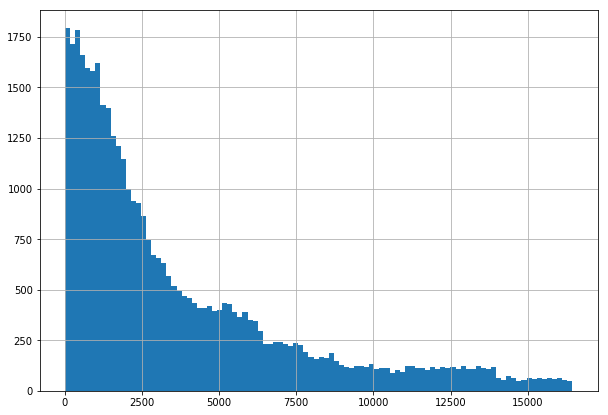

In [256]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

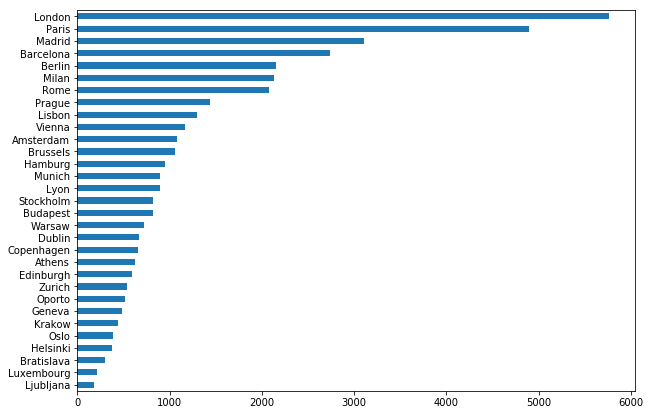

In [257]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

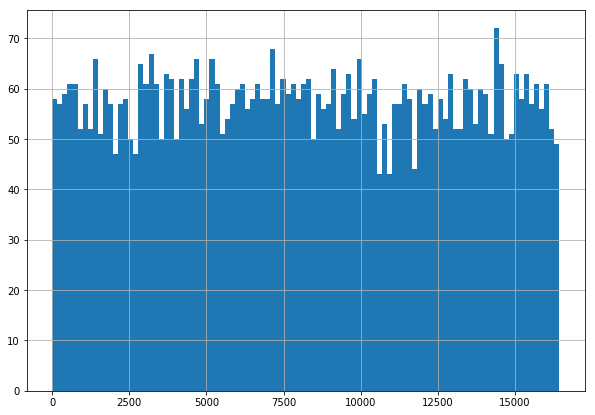

In [258]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

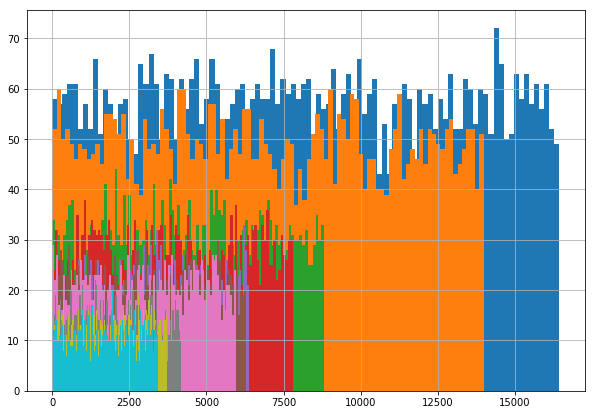

In [259]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

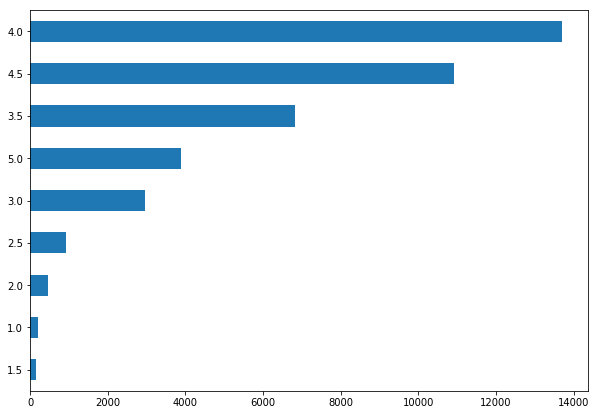

In [260]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

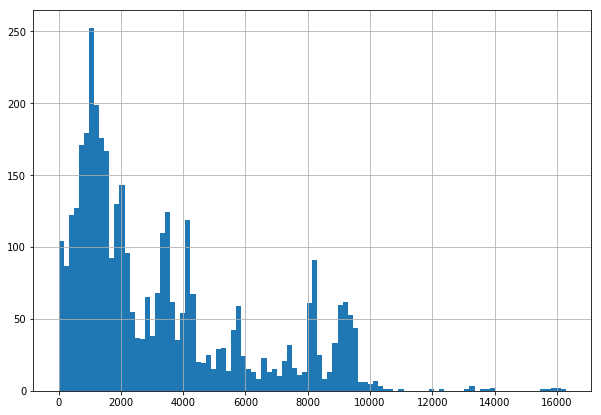

In [261]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

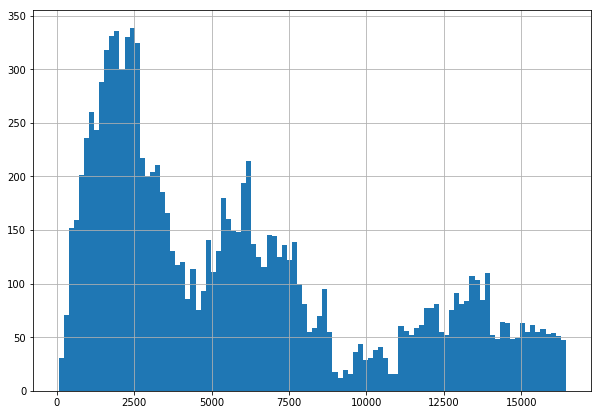

In [262]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [263]:
from itertools import combinations

def get_corr(dataframe, name):
    digit_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    combinations_all = list(combinations(digit_columns, 2))
    corr = {}
    
    for c in combinations_all:
        col1 = dataframe[c[0]]
        col2 = dataframe[c[1]]
        corr[c] = col1.corr(other=col2)

    idx = pd.MultiIndex.from_tuples(corr.keys(), names=['A', 'B'])
    #corr = pd.Series(corr, index = idx).sort_values()
    corr = pd.DataFrame(list(corr.values()), index=idx,
                        columns=[name]).sort_values(by=name)
    return corr

corr = get_corr(data.drop(['sample'], axis=1), 'general')

In [264]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 300)

perc25 = (abs(corr.max()) + abs(corr.min())) * \
    0.125  # ((abs(a) + abs(b)) / 2) * 0.25
display(corr[(corr < -perc25) | (corr > perc25)].dropna())

,,general
A,B,
Cuisine Count,cuisine_isNaN,-0.637124
RankingToRestaraunts,cuisine_vegetarian friendly,-0.550150
Cuisine Count,RankingToRestaraunts,-0.547264
RankingToRestaraunts,cuisine_gluten free options,-0.408048
Number of Reviews,RankingToRestaraunts,-0.407862
RankingToRestaraunts,cuisine_vegan options,-0.389868
cuisine_vegetarian friendly,cuisine_isNaN,-0.342913
cuisine_european,cuisine_isNaN,-0.318178
Ranking,Cuisine Count,-0.315655


Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [265]:
from collections import Counter

In [266]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
 

    
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    

    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [267]:
data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'Number_of_Reviews_isNAN',
       ...
       'cuisine_israeli', 'cuisine_indian', 'cuisine_czech', 'cuisine_hungarian', 'cuisine_new zealand', 'cuisine_slovenian', 'cuisine_georgian', 'cuisine_bangladeshi', 'cuisine_cuban', 'Diffs'],
      dtype='object', length=180)

In [268]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Citizen,OE,CC,City_amsterdam,City_athens,City_barcelona,City_berlin,City_bratislava,City_brussels,City_budapest,City_copenhagen,City_dublin,City_edinburgh,City_geneva,City_hamburg,City_helsinki,City_krakow,City_lisbon,City_ljubljana,City_london,City_luxembourg,City_lyon,City_madrid,City_milan,City_munich,City_oporto,City_oslo,City_paris,City_prague,City_rome,City_stockholm,City_vienna,City_warsaw,City_zurich,City_nan,Price Range_$,Price Range_$$ - $$$,Price Range_$$$$,Price Range_nan,Cuisine Count,RankingToRestaraunts,cuisine_contemporary,cuisine_wine bar,cuisine_austrian,cuisine_fast food,cuisine_international,cuisine_uzbek,cuisine_grill,cuisine_bar,cuisine_welsh,cuisine_indonesian,cuisine_sushi,cuisine_dutch,cuisine_nepali,cuisine_burmese,cuisine_central american,cuisine_central asian,cuisine_korean,cuisine_lebanese,cuisine_romanian,cuisine_mongolian,cuisine_spanish,cuisine_vegetarian friendly,cuisine_gluten free options,cuisine_malaysian,cuisine_taiwanese,cuisine_argentinean,cuisine_vegan options,cuisine_persian,cuisine_diner,cuisine_swiss,cuisine_mexican,cuisine_latin,cuisine_french,cuisine_ethiopian,cuisine_pizza,cuisine_canadian,cuisine_cambodian,cuisine_pakistani,cuisine_tibetan,cuisine_steakhouse,cuisine_caucasian,cuisine_european,cuisine_vietnamese,cuisine_yunnan,cuisine_soups,cuisine_irish,cuisine_scandinavian,cuisine_fusion,cuisine_danish,cuisine_swedish,cuisine_moroccan,cuisine_american,cuisine_eastern european,cuisine_russian,cuisine_xinjiang,cuisine_jamaican,cuisine_balti,cuisine_south american,cuisine_central european,cuisine_latvian,cuisine_hawaiian,cuisine_albanian,cuisine_african,cuisine_singaporean,cuisine_scottish,cuisine_southwestern,cuisine_mediterranean,cuisine_brew pub,cuisine_afghani,cuisine_polynesian,cuisine_greek,cuisine_gastropub,cuisine_australian,cuisine_british,cuisine_isNaN,cuisine_kosher,cuisine_sri lankan,cuisine_polish,cuisine_ukrainian,cuisine_delicatessen,cuisine_croatian,cuisine_healthy,cuisine_fujian,cuisine_turkish,cuisine_peruvian,cuisine_asian,cuisine_tunisian,cuisine_halal,cuisine_chilean,cuisine_seafood,cuisine_thai,cuisine_italian,cuisine_minority chinese,cuisine_filipino,cuisine_native american,cuisine_venezuelan,cuisine_egyptian,cuisine_portuguese,cuisine_cafe,cuisine_german,cuisine_barbecue,cuisine_ecuadorean,cuisine_middle eastern,cuisine_japanese,cuisine_salvadoran,cuisine_norwegian,cuisine_arabic,cuisine_caribbean,cuisine_armenian,cuisine_pub,cuisine_brazilian,cuisine_chinese,cuisine_colombian,cuisine_belgian,cuisine_cajun & creole,cuisine_azerbaijani,cuisine_street food,cuisine_israeli,cuisine_indian,cuisine_czech,cuisine_hungarian,cuisine_new zealand,cuisine_slovenian,cuisine_georgian,cuisine_bangladeshi,cuisine_cuban,Diffs
17261,955.0,0.0,1,5.0,1,214935,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.487539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.0
9087,414.0,206.0,0,0.0,0,544107,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0.495215,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.0
28732,378.0,20.0,1,4.0,0,681067,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.774590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76.0
12077,3618.0,263.0,1,3.0,0,1372434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [269]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 173 entries, Ranking to Diffs
dtypes: float64(5), int64(131), uint8(37)
memory usage: 54.0 MB


In [270]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [271]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [272]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 172), (40000, 172), (40000, 171), (32000, 171), (8000, 171))

# Model 
Сам ML

In [273]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [274]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [275]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [276]:
y_pred

array([3.775, 4.6  , 4.425, ..., 4.715, 3.81 , 4.06 ])

Поскольку рейтинг кратен 0.5, округляем

In [277]:
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i] * 2) / 2

In [278]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических. 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 

MAE: 0.1760625


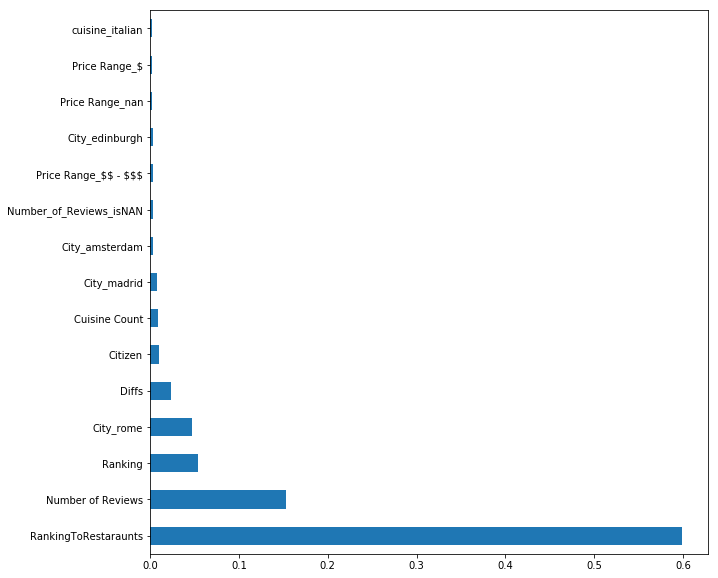

In [279]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [280]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Citizen,OE,CC,City_amsterdam,City_athens,City_barcelona,City_berlin,City_bratislava,City_brussels,City_budapest,City_copenhagen,City_dublin,City_edinburgh,City_geneva,City_hamburg,City_helsinki,City_krakow,City_lisbon,City_ljubljana,City_london,City_luxembourg,City_lyon,City_madrid,City_milan,City_munich,City_oporto,City_oslo,City_paris,City_prague,City_rome,City_stockholm,City_vienna,City_warsaw,City_zurich,City_nan,Price Range_$,Price Range_$$ - $$$,Price Range_$$$$,Price Range_nan,Cuisine Count,RankingToRestaraunts,cuisine_contemporary,cuisine_wine bar,cuisine_austrian,cuisine_fast food,cuisine_international,cuisine_uzbek,cuisine_grill,cuisine_bar,cuisine_welsh,cuisine_indonesian,cuisine_sushi,cuisine_dutch,cuisine_nepali,cuisine_burmese,cuisine_central american,cuisine_central asian,cuisine_korean,cuisine_lebanese,cuisine_romanian,cuisine_mongolian,cuisine_spanish,cuisine_vegetarian friendly,cuisine_gluten free options,cuisine_malaysian,cuisine_taiwanese,cuisine_argentinean,cuisine_vegan options,cuisine_persian,cuisine_diner,cuisine_swiss,cuisine_mexican,cuisine_latin,cuisine_french,cuisine_ethiopian,cuisine_pizza,cuisine_canadian,cuisine_cambodian,cuisine_pakistani,cuisine_tibetan,cuisine_steakhouse,cuisine_caucasian,cuisine_european,cuisine_vietnamese,cuisine_yunnan,cuisine_soups,cuisine_irish,cuisine_scandinavian,cuisine_fusion,cuisine_danish,cuisine_swedish,cuisine_moroccan,cuisine_american,cuisine_eastern european,cuisine_russian,cuisine_xinjiang,cuisine_jamaican,cuisine_balti,cuisine_south american,cuisine_central european,cuisine_latvian,cuisine_hawaiian,cuisine_albanian,cuisine_african,cuisine_singaporean,cuisine_scottish,cuisine_southwestern,cuisine_mediterranean,cuisine_brew pub,cuisine_afghani,cuisine_polynesian,cuisine_greek,cuisine_gastropub,cuisine_australian,cuisine_british,cuisine_isNaN,cuisine_kosher,cuisine_sri lankan,cuisine_polish,cuisine_ukrainian,cuisine_delicatessen,cuisine_croatian,cuisine_healthy,cuisine_fujian,cuisine_turkish,cuisine_peruvian,cuisine_asian,cuisine_tunisian,cuisine_halal,cuisine_chilean,cuisine_seafood,cuisine_thai,cuisine_italian,cuisine_minority chinese,cuisine_filipino,cuisine_native american,cuisine_venezuelan,cuisine_egyptian,cuisine_portuguese,cuisine_cafe,cuisine_german,cuisine_barbecue,cuisine_ecuadorean,cuisine_middle eastern,cuisine_japanese,cuisine_salvadoran,cuisine_norwegian,cuisine_arabic,cuisine_caribbean,cuisine_armenian,cuisine_pub,cuisine_brazilian,cuisine_chinese,cuisine_colombian,cuisine_belgian,cuisine_cajun & creole,cuisine_azerbaijani,cuisine_street food,cuisine_israeli,cuisine_indian,cuisine_czech,cuisine_hungarian,cuisine_new zealand,cuisine_slovenian,cuisine_georgian,cuisine_bangladeshi,cuisine_cuban,Diffs
9137,1056.0,3.0,0.0,0,664046,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.360825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,417.0
8787,2977.0,103.0,0.0,0,8538689,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0.413875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0
3299,3013.0,1295.0,0.0,0,2864466,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5,1.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.0
764,21.0,309.0,0.0,0,415367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [281]:
test_data = test_data.drop(['Rating'], axis=1)

In [282]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [283]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [284]:
predict_submission

array([3.125, 4.23 , 4.355, ..., 3.04 , 4.3  , 4.25 ])

In [285]:
for i in range(len(predict_submission)):
    predict_submission[i] = round(predict_submission[i] * 2) / 2

In [286]:
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4. ])

In [287]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [288]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
